In [1]:
import tensorflow as tf
import keras
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers.normalization import BatchNormalization
import cv2

Using TensorFlow backend.


In [2]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk


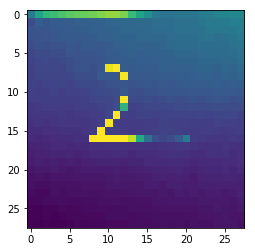

In [3]:
img_w = img_h = 28
frame = cv2.imread('input.png')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
alpha =2.75
beta = -160.0
frame = alpha * frame + beta
frame = np.clip(frame, 0, 255).astype(np.uint8)
frame = cv2.fastNlMeansDenoising(frame, None, 31, 7, 21)

#frame = cv2.medianBlur(frame, 5)
#frame = cv2.adaptiveThreshold(frame,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
frame = cv2.resize(frame, (img_w, img_h))
frame = cv2.bitwise_not(frame)
plt.imshow(frame)
frame = np.array(frame).reshape(1, 28, 28, 1)
#print(frame)
#frame = tf.keras.utils.normalize(frame, axis=1)


In [4]:
prediction = loaded_model.predict(frame)
print(prediction)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
prediction = prediction[0]
bestclass = ''
bestconf = -1
for n in [0,1,2,3,4,5,6,7,8,9]:
	if (prediction[n] > bestconf):
		bestclass = str(n)
		bestconf = prediction[n]
print('I think this digit is a ' + bestclass + ' with ' + str(bestconf * 100) + '% confidence.')


I think this digit is a 4 with 100.0% confidence.
